this is our 2D subspace:
 [[ 0.36158968 -0.65653988]
 [-0.08226889 -0.72971237]
 [ 0.85657211  0.1757674 ]
 [ 0.35884393  0.07470647]]


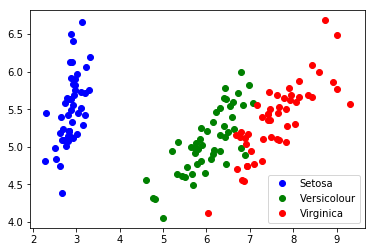

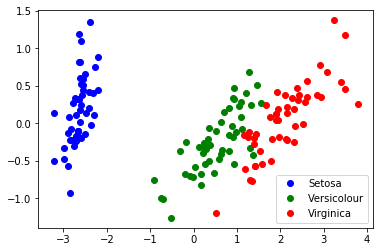

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn import datasets

### 1 GENERATE DATA
iris = datasets.load_iris()
### Pay attention that "X" is a (150, 4) shape matrix
### y is a (150,) shape array
X = iris.data
y = iris.target


### 2 CENTER DATA
X_centered = X - X.mean()
X_centered = X_centered.T

### 3 PROJECT DATA
### at first you need to get covariance matrix
### Pay attention that cov_mat should be a (4, 4) shape matrix
cov_mat = np.cov(X_centered)
### next step you need to find eigenvalues and eigenvectors of covariance matrix
eig_values, eig_vectors = np.linalg.eig(cov_mat)
### find out which eigenvectors you should choose based on eigenvalues
index_1 = 0
index_2 = 1
for i in range(len(eig_values)):
    if (eig_values[i] >= eig_values[index_1]):
        index_1 = i
    elif (eig_values[i] > eig_values[index_2]):
        index_2 = i
print(f"this is our 2D subspace:\n {eig_vectors[:, [index_1,index_2]]}")
### now we can project our data to this 2D subspace
### project original data on chosen eigenvectors
matrix_w = eig_vectors[:, [index_1, index_2]]
matrix_w.T[1] = matrix_w.T[1] * (-1)
projected_data = matrix_w.T.dot(X.T)

plt.plot(projected_data.T[y == 0, 0], projected_data.T[y == 0, 1], 'bo', label='Setosa')
plt.plot(projected_data.T[y == 1, 0], projected_data.T[y == 1, 1], 'go', label='Versicolour')
plt.plot(projected_data.T[y == 2, 0], projected_data.T[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0)
plt.show()
### now you are able to visualize projected data
### you should get excactly the same picture as in the last lab slide


### 4 RESTORE DATA
### we have a "projected_data" which shape is (2,150)
### and we have a 2D subspace "eig_vectors[:, [index_1, index_2]]" which shape is (4,2)
### how to recieve a restored data with shape (4,150)?

restored_data = projected_data.T.dot(matrix_w.T)

############################################
### CONGRATS YOU ARE DONE WITH THE FIRST PART ###
############################################

### 1 GENERATE DATA
### already is done

### 2 CENTER DATA
### already is done

### 3 PROJECT DATA
### "n_components" show how many dimensions should we project our data on 
pca = decomposition.PCA(n_components=2)
### class method "fit" for our centered data
pca.fit(X_centered.T)
### make a projection
X_pca = pca.transform(X_centered.T)
### now we can plot our data and compare with what should we get
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0)
plt.show()